In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df_origin = pd.read_csv('data/train.csv')
df_origin_test = pd.read_csv('data/test.csv')

# Import Encoded Dataset

In [3]:
df = pd.read_csv('Final Train.csv')
df_comp = pd.read_csv('Final Test.csv')

# Split Dataset

In [4]:
X = df.drop(columns=['row_id', 'date', 'num_sold'])
y = df[['num_sold']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

# Create Models

### Random Forest

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
rf = RandomForestRegressor(max_depth = 20, min_samples_leaf = 4, n_estimators=1000)

In [8]:
rf.fit(X_train, y_train)

<ipython-input-8-168a6fc83696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, min_samples_leaf=4, n_estimators=1000)

In [9]:
prediction = rf.predict(X_test)

In [10]:
rf.score(X_test, y_test)

0.9732169034117849

# Tune Dataset

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 500, 1000],
              'min_samples_leaf': [1, 2, 4],
              'max_depth': [5, 10, 20],
              'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

# Comp Prediction

In [11]:
comp_pred = rf.predict(df_comp.drop(columns=['date', 'row_id']))

In [12]:
comp_pred = np.around(comp_pred)

In [13]:
df_final = df_comp

In [14]:
df_final['num_sold'] = comp_pred
df_final['num_sold'] = df_final['num_sold'].astype(int)

/Users/marcwork/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/marcwork/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='num_sold'>

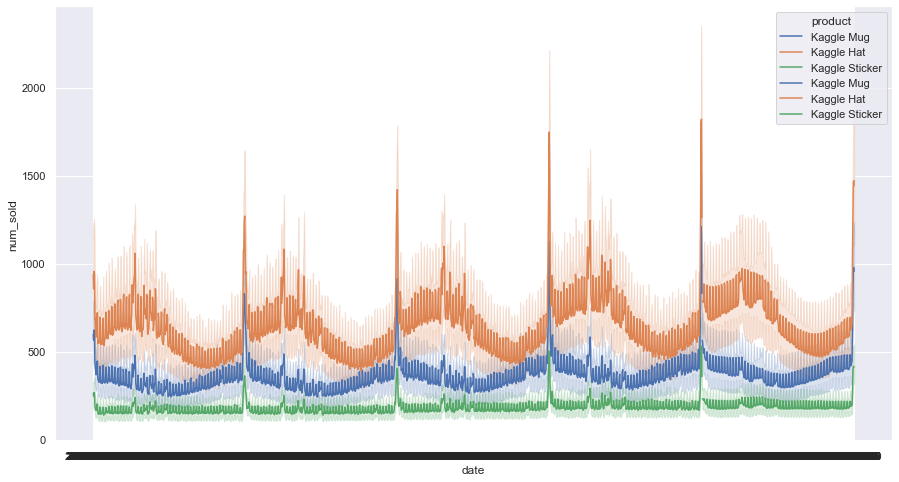

In [15]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(df['date'], df['num_sold'], hue=df_origin['product'])
sns.lineplot(df_comp['date'], df_final['num_sold'], hue=df_origin_test['product'])

In [16]:
df_final = df_final[['row_id', 'num_sold']]

In [17]:
df_final.to_csv('Algo Submission.csv', index=False)

1st - .797, 2nd - .897, 3rd - .907